In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# https://www.kaggle.com/yonatanrabinovich/bigmart-sales-data-analysis-and-prediction
data=pd.read_csv('https://raw.githubusercontent.com/tkseneee/Dataset/master/k_circle_sales.csv')

In [ ]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3


In [ ]:
#Whether this data is having missing value?
data.isnull().sum()


Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [ ]:
data.isnull().sum()/len(data)*100

Item_Identifier               0.000000
Item_Weight                   8.787985
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type         24.052564
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Profit                        0.000000
dtype: float64

In [ ]:
# #Techniques to handle the missing values
# 1.Dropping Approach
#      a.Droping the rows
#      b.Droping the columns
# 2. Imputation (filling the missing values)
#      a. Mean Imputation
#      b. Median Imputation
#      c. Mode Imputation
#      d. Groupby based imputation
#      e. Rule based imputation
#      f. Machine Learning model based imputation

In [ ]:
data1=data.dropna()

In [ ]:
print('Length of the original data:',len(data))
print('Length of the data after dropping the NaNs:',len(data1))

Length of the original data: 8523
Length of the data after dropping the NaNs: 5364


In [ ]:
data1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

In [ ]:
(len(data)-len(data1))/len(data)*100
# If this percentage of reduction is less than 3 percent, I may go with 
                                  # dropping therow appraoch

37.06441393875396

In [ ]:
# Dropping the column
#If more than 40 percent of data is missing in one column, better we can drop that column

In [ ]:
# Filling the missing values
# Make sure that , data charecteristics are not changing

In [ ]:
data['Item_Weight'].mean() # mean for original data

11.67673977360451

In [ ]:
data['Item_Weight'].describe()

count    7774.000000
mean       11.676740
std         5.776851
min         0.000000
25%         7.720000
50%        11.800000
75%        16.500000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
data['Item_Weight']=data['Item_Weight'].replace(0,np.nan)

In [ ]:
data=data.replace(0,np.nan)

In [ ]:
data['Item_Weight'].isnull().sum()

1463

In [ ]:
data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

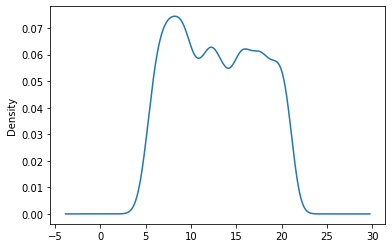

In [ ]:
data['Item_Weight'].plot(kind='kde')

In [ ]:
# Mean Imputation
data['Item_Weight'].fillna(data['Item_Weight'].mean()).isnull().sum()

0

In [ ]:
data['Item_Weight'].mean()


12.857645184136183

In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mean()).describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

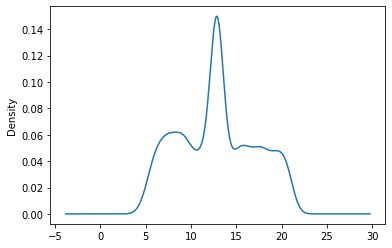

In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mean()).plot(kind='kde')
#Mean imputation changes the distribution shape, which is not preferred 

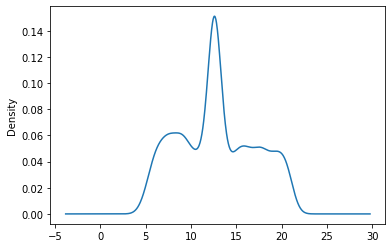

In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].median()).plot(kind='kde')

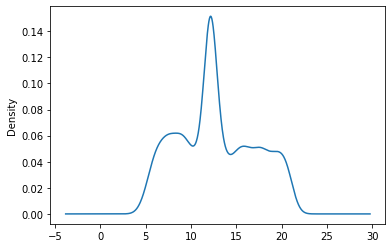

In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mode()[0]).plot(kind='kde')

In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mode()).isnull().sum()

1463

In [ ]:
data['Item_Weight'].mode()[0]

12.15

In [ ]:
# Groupby based imputation

In [ ]:
data.groupby('Item_Identifier')['Item_Weight'].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

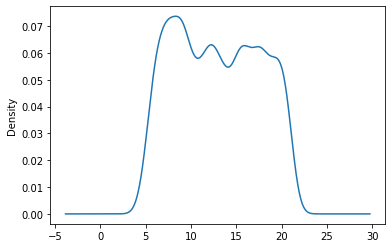

In [ ]:
data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean')).plot(kind='kde')

In [ ]:
#Distribution of data is remaining same after groupby based imputation

In [ ]:
data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean')).isnull().sum()

4

In [ ]:
data['Item_Weight']=data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [ ]:
data['Item_Weight'].isnull().sum()

4

In [ ]:
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

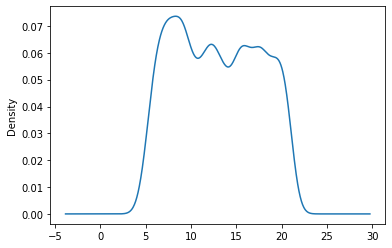

In [ ]:
data['Item_Weight'].plot(kind='kde')

In [ ]:
# If the percentage of missing values are less than 3 percent then we can use 
# mean or median imputation, otherwise go with groupby based imputation tech


# If data is having outlier and percentage of missing value is less than 3,
                                              #then use median imputaion

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [ ]:
data['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [ ]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
data['Outlet_Size'].mode()

0    Medium
dtype: object

In [ ]:
data['Outlet_Size'].value_counts(normalize=True)

Medium    0.456895
Small     0.390643
High      0.152462
Name: Outlet_Size, dtype: float64

In [ ]:


# Generally we can go for mode imputation for categorical column, but not always, especially when 
       # the mode level representation is not much higher than next level representations

In [ ]:
# Rule based imputation

data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

Rule1 : If sales value is anything below 2100, fill the missing value in outlet_size as Small

Rule2 : If the sales value is anything above 2500, fill the missing values in outlet_size as Medium

Rule3 : If the sales value is anything between 2100 to 2500 , fill the missing values in outlet_size as High

The above rules are just example, you can come up with own rule by properly exploring the data.

In [ ]:
ind=data[data['Outlet_Size'].isnull()].index

In [ ]:
for i in ind:
    if data.loc[i,'Item_Outlet_Sales']<2100:
        data.loc[i,'Outlet_Size']='Small'
    elif data.loc[i,'Item_Outlet_Sales']>2500:
        data.loc[i,'Outlet_Size']='Medium'
    else:
        data.loc[i,'Outlet_Size']='High'
        

In [ ]:
data['Outlet_Size'].isnull().sum()

0

In [ ]:
data['Outlet_Size'].value_counts()

Small     3947
Medium    3483
High      1093
Name: Outlet_Size, dtype: int64

In [ ]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.138,11.5


In [ ]:
data.loc[0,'Item_Weight']

9.3

In [ ]:
data.iloc[0,1]

9.3

In [ ]:
#data.loc[0,1]

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [ ]:
data['Outlet_Location_Type'].value_counts()

Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -         67
na          48
NAN         16
Name: Outlet_Location_Type, dtype: int64

In [ ]:
data['Outlet_Location_Type'].unique()

array(['Tier 2', nan, 'Tier 3', '  --', 'Tier1', 'na', '  -', '?', 'NAN'],
      dtype=object)

In [ ]:
data['Outlet_Location_Type']=data['Outlet_Location_Type'].replace({'?':np.nan,
                                    '  --':np.nan,
                                     '  -':np.nan,
                                     'na':np.nan,
                                     'NAN':np.nan})

In [ ]:
data['Outlet_Location_Type'].value_counts()

Tier 2    2793
Tier1     2388
Tier 3     932
Name: Outlet_Location_Type, dtype: int64

In [ ]:
#Medium    2793
#Small     2388
#High       932

In [ ]:
data=data.drop('Outlet_Location_Type',axis=1)

In [ ]:
data.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Type                    0
Item_Outlet_Sales              0
Profit                         0
dtype: int64

### Outlier Treatment

In [ ]:
num_data=data.select_dtypes(include=np.number)
num_data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')

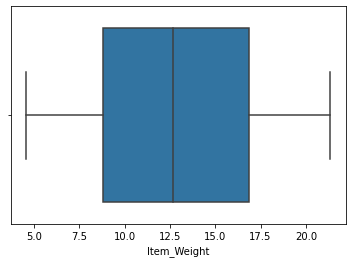

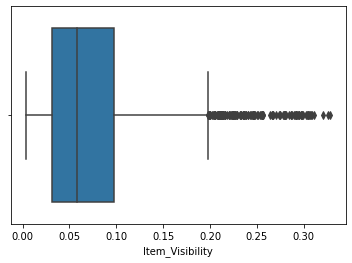

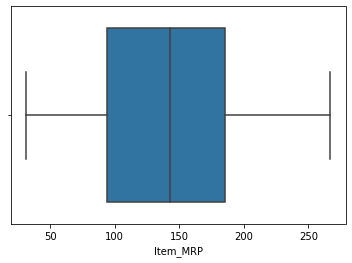

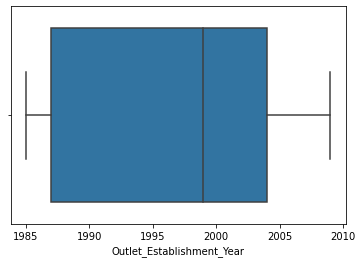

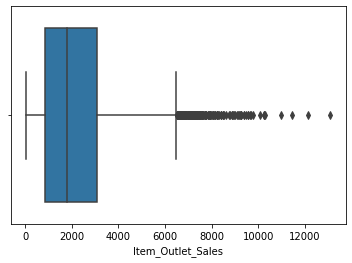

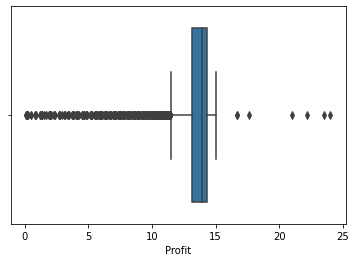

In [ ]:
# 1. Identify the outlier
import seaborn as sb
import matplotlib.pyplot as plt
for i in num_data.columns:
    sb.boxplot(x=num_data[i])
    plt.show()

In [ ]:
# Howmany outliers are there in each column ?

In [ ]:
q1=data['Profit'].quantile(0.25)
q3=data['Profit'].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
#print(ub,lb)
data_outli=data[((data['Profit']>ub) | (data['Profit']<lb))]
print(len(data_outli)/len(data)*100)

8.271735304470257


In [ ]:
for i in num_data.columns:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    #print(ub,lb)
    data_outli=data[((data[i]>ub) | (data[i]<lb))]
    print('The percentage of outliers in ',i, np.round(len(data_outli)/len(data)*100))

The percentage of outliers in  Item_Weight 0.0
The percentage of outliers in  Item_Visibility 2.0
The percentage of outliers in  Item_MRP 0.0
The percentage of outliers in  Outlet_Establishment_Year 0.0
The percentage of outliers in  Item_Outlet_Sales 2.0
The percentage of outliers in  Profit 8.0


In [ ]:
# Treatment of Outlier
#1. Dropping it
#2. Capping it
#3. Transforming it

In [ ]:
# Droping the outlier
q1=data['Profit'].quantile(0.25)
q3=data['Profit'].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
#print(ub,lb)
#data_outli_free=data[~((data['Profit']>ub) | (data['Profit']<lb))]
data_outli_free=data[((data['Profit']<ub) & (data['Profit']>lb))]
print(len(data_outli_free)/len(data)*100)

91.72826469552973


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


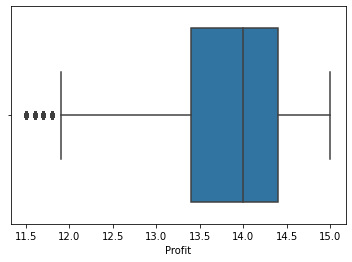

In [ ]:
sb.boxplot(data_outli_free['Profit'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


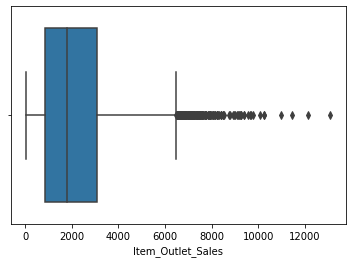

In [ ]:
sb.boxplot(data_outli_free['Item_Outlet_Sales'])

In [ ]:
q1=data_outli_free['Item_Outlet_Sales'].quantile(0.25)
q3=data_outli_free['Item_Outlet_Sales'].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
#print(ub,lb)
#data_outli_free=data[~((data['Profit']>ub) | (data['Profit']<lb))]
data_outli_free1=data_outli_free[((data_outli_free['Item_Outlet_Sales']<ub) & (data_outli_free['Item_Outlet_Sales']>lb))]
print(len(data_outli_free1)/len(data)*100)

89.6984629825179


In [ ]:
q1=data_outli_free1['Item_Visibility'].quantile(0.25)
q3=data_outli_free1['Item_Visibility'].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
#print(ub,lb)
#data_outli_free=data[~((data['Profit']>ub) | (data['Profit']<lb))]
data_outli_free2=data_outli_free1[((data_outli_free1['Item_Visibility']<ub) & (data_outli_free1['Item_Visibility']>lb))]
print(len(data_outli_free2)/len(data)*100)

82.8816144550041


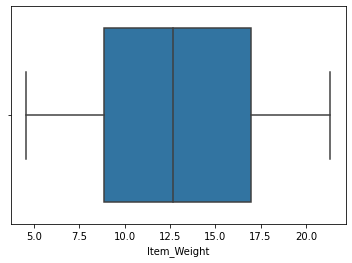

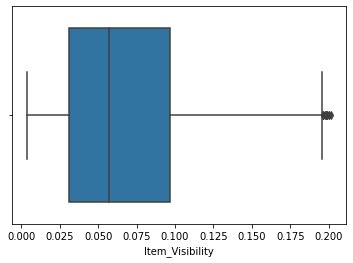

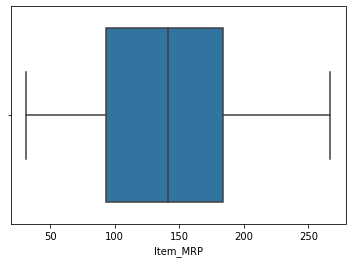

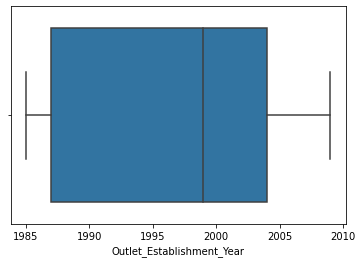

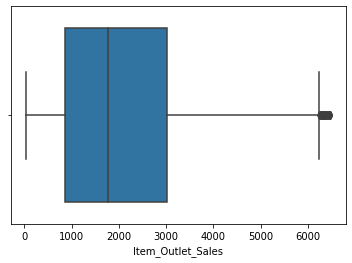

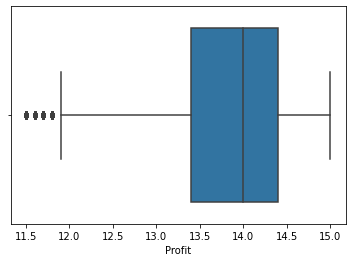

In [ ]:
for i in num_data.columns:
    sb.boxplot(x=data_outli_free2[i])
    plt.show()

In [ ]:
num_data=data.select_dtypes(include=np.number)

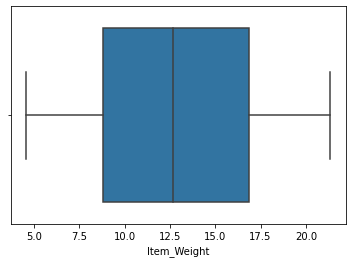

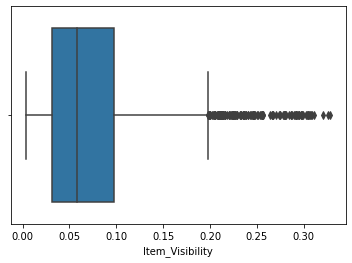

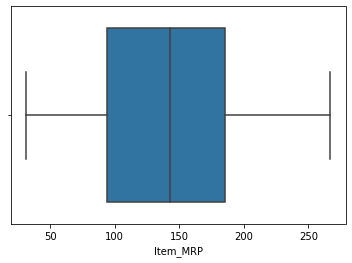

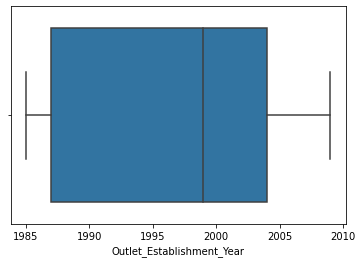

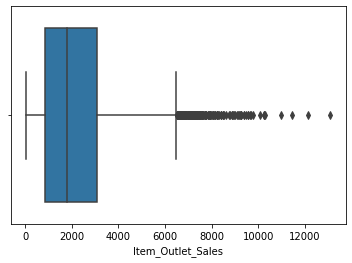

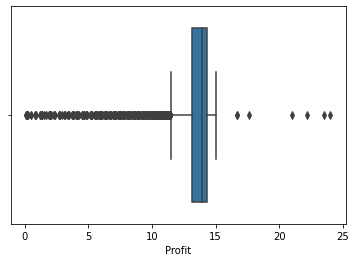

In [ ]:
for i in num_data.columns:
    sb.boxplot(x=num_data[i])
    plt.show()

In [ ]:
# CApping the Outlier

for i in num_data.columns:
    q1=num_data[i].quantile(0.25)
    q3=num_data[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    uc=num_data[i].quantile(0.99)
    lc=num_data[i].quantile(0.01)
    
    ind1=num_data[num_data[i]>ub].index
    ind2=num_data[num_data[i]<lb].index
    
    num_data.loc[ind1,i]=uc
    num_data.loc[ind2,i]=lc
        

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

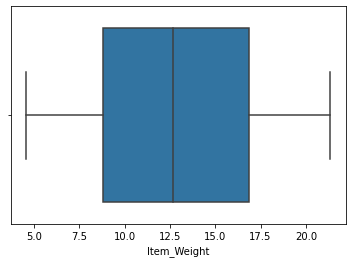

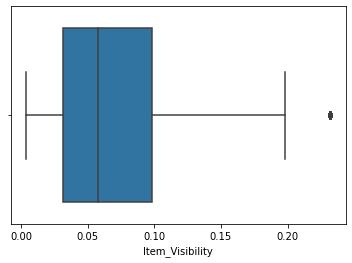

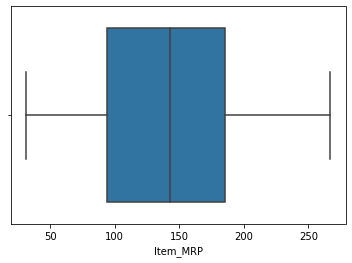

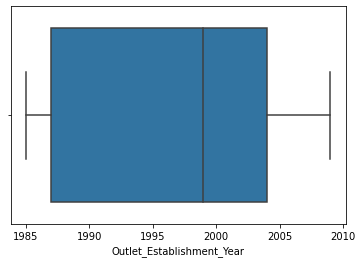

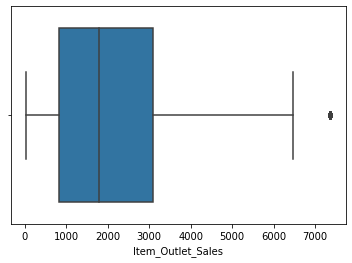

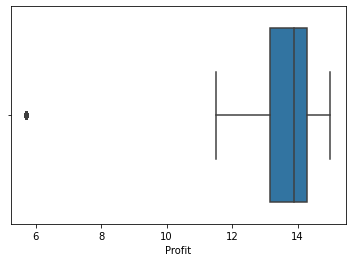

In [ ]:
for i in num_data.columns:
    sb.boxplot(x=num_data[i])
    plt.show()

### 3. Transforming the variables

In [ ]:
num_data=data.select_dtypes(include=np.number)

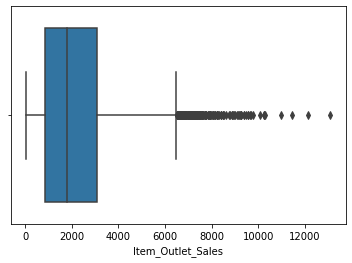

In [ ]:
sb.boxplot(x=num_data['Item_Outlet_Sales'])

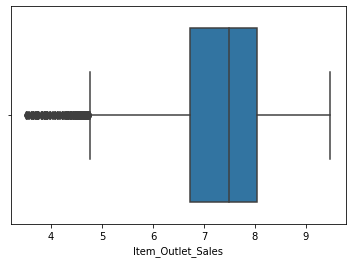

In [ ]:
sales_log=np.log(num_data['Item_Outlet_Sales'])
sb.boxplot(x=sales_log)

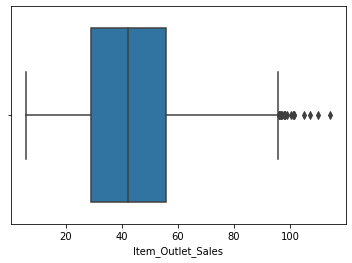

In [ ]:
sales_sqrt=np.sqrt(num_data['Item_Outlet_Sales'])
sb.boxplot(x=sales_sqrt)

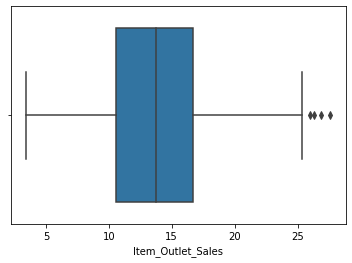

In [ ]:





sales_pow=np.power(num_data['Item_Outlet_Sales'],0.35)
sb.boxplot(x=sales_pow)